In [1]:
using Luxor
using Colors
using Plots
using IterTools
using DataFrames
using OpenStreetMapX
using LightOSM
include("prepare_data.jl")
include("analyse.jl")
include("plots.jl")

plot_attractiveness_of_sectors_prcnt (generic function with 1 method)

In [5]:
city = "Warszawa"
admin_level = "6"
search_area = 1000
attr = :police
wilderness_distance = 300
shape = "circle"
calculate_percent = true
num_of_points = 360
distance_sectors = 200.0
scrape_config = "poi_config_test.csv"
num_of_sectors = 100

100

In [6]:
#points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
#                    city, #city_name
#                    admin_level, #admin_level
#                    search_area, #search_area
#                    attr, #attr
#                    wilderness_distance, #wilderness_distance
#                    shape, #shape
#                    calculate_percent = calculate_percent,
#                    num_of_points = num_of_points,
#                    scrape_config = scrape_config)
#attr_heat = matrix_log_scaling(attr_heat)

points_heat,attr_heat,bounds_heat = calculate_attractiveness_for_city_points(                                      
                    city, #city_name
                    admin_level, #admin_level
                    search_area, #search_area
                    attr, #attr
                    wilderness_distance, #wilderness_distance
                    "rectangle", #shape
                    calculate_percent = false,
                    distance_sectors = 250,
                    num_of_points = num_of_points,
                    scrape_config = scrape_config)
attr_heat = matrix_log_scaling(attr_heat)
2+2

2+2

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


4

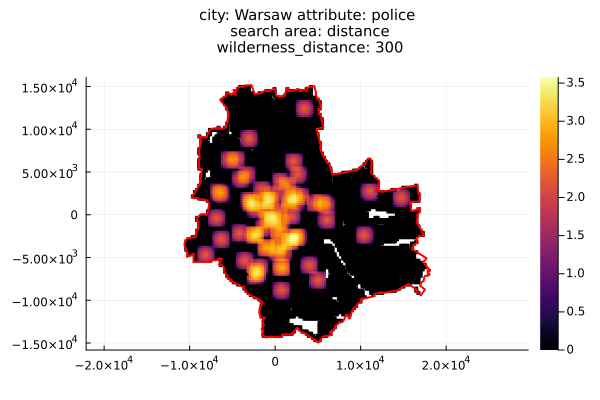

In [7]:
plot_heatmap(points_heat,attr_heat,bounds_heat,:police,"Warsaw","distance",300)

In [8]:
points_prct_Ww,attr_prct_Ww,bounds_prct_Ww = calculate_attractiveness_for_city_sectors(                                      
                                     city, #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
#                                     distance_sectors=200,
                                     scrape_config = scrape_config)

attr_prct_Ww = min_max_scaling(attr_prct_Ww)

points_prct_Krk,attr_prct_Krk,bounds_prct_Krk = calculate_attractiveness_for_city_sectors(                                      
                                     "Kraków", #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
#                                     distance_sectors=200,
                                     scrape_config = scrape_config)

attr_prct_Krk = min_max_scaling(attr_prct_Krk)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97
┌ Info: Read map data from cache Kraków.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


100-element Vector{Float64}:
 1.0
 0.4535679370961936
 0.2827302844053565
 0.19277039438366228
 0.12359022056016064
 0.08014608815681153
 0.05562262945118028
 0.03828217197022592
 0.02596513410388199
 0.017535366612340807
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [9]:
points_dist,attr_dist,bounds_dist = calculate_attractiveness_for_city_sectors(                                      
                                     city, #city_name
                                     admin_level, #admin_level
                                     search_area, #search_area
                                     attr, #attr
                                     wilderness_distance, #wilderness_distance
                                     num_of_points, #num_of_points
                                     calculate_percent=false,
                                     distance_sectors=distance_sectors,
                                     num_of_sectors=num_of_sectors,
                                     scrape_config = scrape_config)

attr_dist = min_max_scaling(attr_dist)

┌ Info: Read map data from cache Warszawa.osm.cache
└ @ OpenStreetMapX /home/adamkas/.julia/packages/OpenStreetMapX/gCd33/src/parseMap.jl:97


100-element Vector{Float64}:
 1.0
 0.4465646313450573
 0.2661097395354366
 0.17394651358230498
 0.12964309760689102
 0.1028063853797027
 0.07953961419257403
 0.06527264002776609
 0.05399850520138023
 0.046784773992118896
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

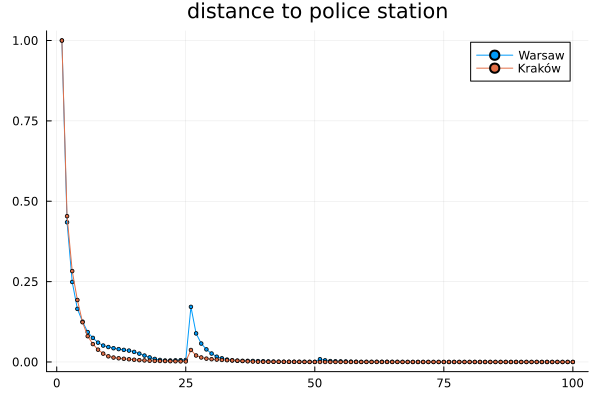

In [12]:
plot_attractiveness_of_sectors_prcnt([attr_prct_Ww,attr_prct_Krk],["Warsaw" "Kraków"],"distance to police station")

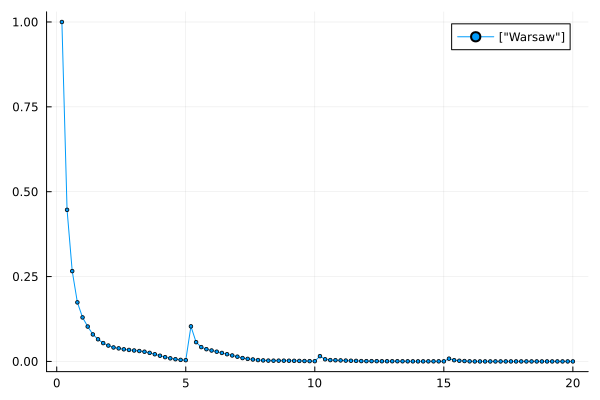

In [11]:
plot_attractiveness_of_sectors_abs(num_of_sectors,distance_sectors,
                                attr_dist,["Warsaw"])